# Constitutive Law data generator

To allow inline pictures, run the following block

In [1]:
%matplotlib inline

Import the useful libraries

In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import math
colors = ['red', 'green', 'blue', 'purple', 'slategrey', 'brown', 'darkorange', 'black']

## Parameters of the Constitutive law

In [3]:
# These are the coefficients of the Constitutive law
A = 806
B = 614
C = 0.0089
n = 0.168
m = 1.1
T0 = 20
Tm = 1540
epsp0 = 0.1

Parameters of the curves to generate

In [4]:
num_eps = 70                             # Number of points on the x axis
eps = np.linspace(0, 1, num_eps)         # Strain ranges from 0 to 1
epsp = np.array([0.1, 1, 50, 1000, 10000, 500000])   # Strain rate values
temp = np.array([20, 100, 200, 300, 500, 800])     # Temperature values



Definition of the Johnson-Cook constitutive law

In [5]:
def constitutiveLaw(eps, epsp, T, A, B, C, n, m):
    return (A + B * eps**n) * (1 + C * np.log(epsp / epsp0)) * (1 - ((T - T0) / (Tm - T0))**m)

## Main data generation

Generation of Data

In [6]:
Tables = []
for T in temp:
    johnsonCook = eps
    for epspi in epsp:
        sig = constitutiveLaw(eps, epspi, T, A, B, C, n, m)
        johnsonCook = np.vstack((johnsonCook, sig))
    Tables.append(johnsonCook.T)    

Plot the data to see how it looks like

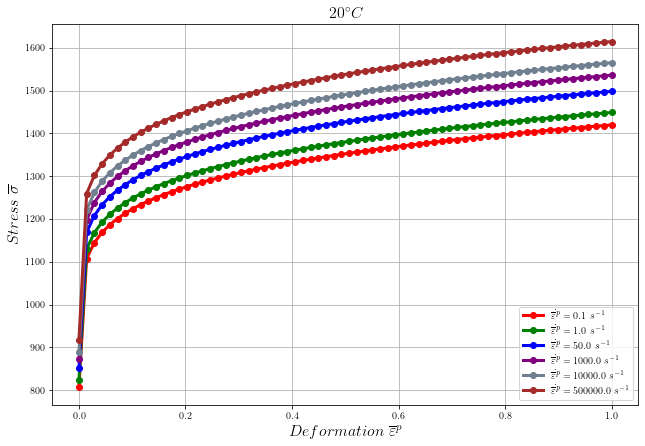

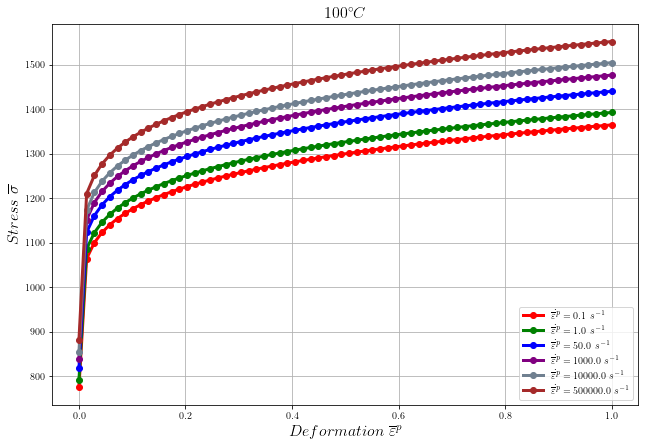

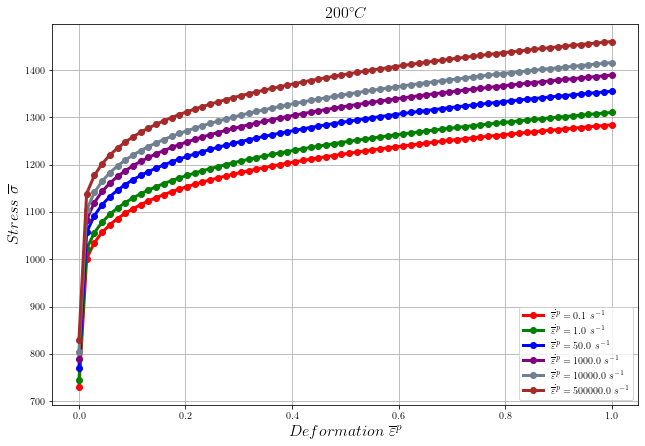

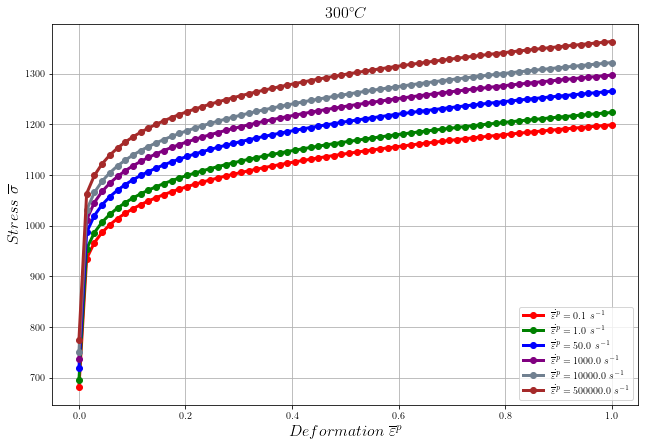

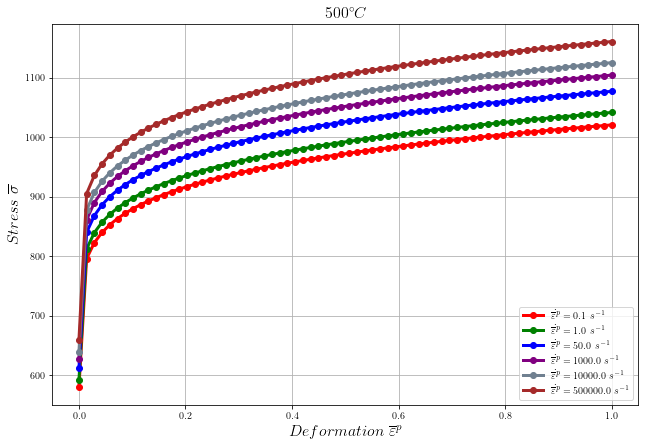

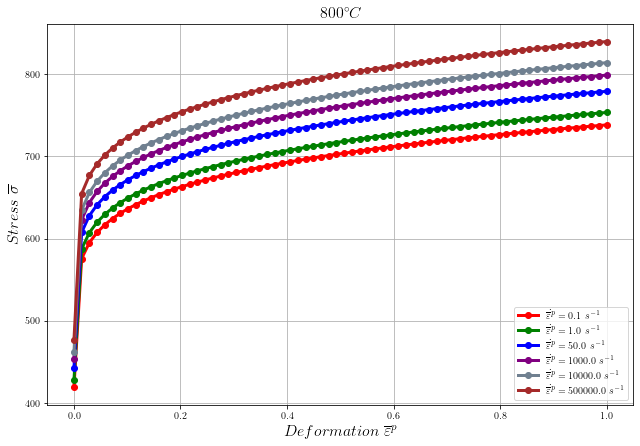

In [7]:
idx = 1
for table in range(len(Tables)):
    plt.figure(figsize = (10.5, 7))
    plt.rc('text', usetex = True)
    johnsonCook = Tables[table]
    # Plot the curves
    for column in range(1, johnsonCook.shape[1]):
        plt.plot(johnsonCook[:,0], johnsonCook[:,column], colors[column-1],
            label=r'$\dot{\overline{\varepsilon}^p}=' + str(epsp[column-1]) + '\ s^{-1}$', marker = 'o',linewidth = 3)
    plt.legend(loc = 'lower right',fancybox = True, numpoints = 1, fontsize = 10)
    plt.grid() # Plot the grid with default size
    plt.xlabel(r'$Deformation\ \overline{\varepsilon}^{p}$', fontsize = 16) # Labels the x axis
    plt.ylabel(r'$Stress\ \overline{\sigma}$', fontsize = 16) # Labels the y axis
    plt.title(r'$' + str(temp[idx-1]) + '^{\circ}C$', fontsize = 16) # Self explicit command
#    plt.savefig('OriginalData'+str(temp[idx-1])+'.svg', bbox_inches = 'tight', pad_inches = 0)
    plt.show()
    idx += 1

Convert Array to Panda Data

In [8]:
data = []
for table in range(len(Tables)):
    # convert your array into a dataframe
    df = pd.DataFrame (Tables[table])

    # Name the columns
    for c in range(len(epsp)):
        df.rename(columns={c+1:epsp[c]}, inplace=True)
    df.rename(columns={0:'epsilon'}, inplace=True)
    data.append(df)

Export data to Excel file

In [9]:
# save to xlsx file
writer = pd.ExcelWriter('JC-Experiments.xlsx', engine='xlsxwriter')
for table in range(len(Tables)):
    data[table].to_excel(writer, index=False, sheet_name= str(temp[table])+'°C')
writer.save()

## Generation of test data

In [10]:
dataPoints = 1000
testData = np.empty((0, 4))

for test in range(dataPoints):
    Eps = np.random.uniform(eps.min()+.05,eps.max())
    Epsp = np.random.uniform(epsp.min(),epsp.max())
    T = np.random.uniform(temp.min(),temp.max())
    sig = constitutiveLaw(Eps, Epsp, T, A, B, C, n, m)
    newrow = np.array([Eps, Epsp, T, sig])
    testData = np.vstack([testData, newrow])
    print(Eps, Epsp, T, sig)

0.7934029409602651 325745.9570542789 749.8900521613066 876.616157003618
0.5671323002285086 78112.41240907363 99.42782295136489 1469.4620158776186
0.6442538859365106 73366.84861991343 779.292545070952 823.215362890213
0.849687383424208 352174.32244445616 100.75090063548076 1528.6611565347444
0.9045401581686385 214359.81673677696 209.0319340923112 1431.8454250807529
0.31482524316205307 443048.0984758028 403.49452552373316 1162.6693309166562
0.45998124388076245 333007.25627116585 346.8576997064119 1243.514196409319
0.3723490009110323 198478.76370223856 402.73093970764563 1168.8126200674646
0.659267771811069 25635.499654975825 178.77395295026457 1403.6801058587973
0.5278642841354916 73638.92767594702 686.3861216166158 906.7933411332219
0.1482092067945288 440969.73586653965 276.7447954406783 1220.89072862502
0.9584609696226721 32752.154881946473 184.19382633613105 1439.3948565233825
0.9866052201235695 65068.36127347711 395.9247166304384 1246.1637280233417
0.09579584962001322 331619.89134379

0.3292651343975994 415956.0210121726 114.67123865926993 1423.4113704301164
0.8764757925485858 459634.4786829567 75.38986154259402 1556.7600678074828
0.7344215951559401 14869.594917609798 749.9122675422041 850.6822537422519
0.30884235953982814 422078.4730737778 570.958883216233 1000.6099189350674
0.4186967917946753 151201.62591186445 374.24510706739267 1202.348799719852
0.8840206304609474 324221.4548283891 613.7772748218241 1027.9527458083835
0.32300410756807885 155506.26764625398 687.8850637400814 881.3474454842711
0.5920009434146186 328202.35495029617 682.6097125625306 928.7126654820711
0.24292263284828247 58424.85717765145 443.1227821761202 1089.1891744836462
0.9328629399064148 218574.68502177807 374.05728940470914 1274.9876917176093
0.14577858124200688 441432.75292839936 709.5551599160186 825.0867152224488
0.17868528811900564 446709.8638450591 570.2289500595703 967.9131057911536
0.6992458531870686 255130.96891081845 272.16506730284186 1348.8515446219149
0.40444231839596007 275002.89

0.3225236746260274 105644.63400055013 304.93873956612714 1241.8545122719615
0.11026001150007061 160531.2797068197 637.7026378947711 871.4689614284695
0.5732114830314443 296957.7483454312 456.4730293905832 1154.348744240769
0.2591009834650665 306149.09934572305 710.2987579878771 851.6492652591796
0.19987135229293518 375170.8017597603 610.2243830034147 935.3127165512698
0.9661965548436465 165148.80235222404 728.5687477135278 907.2146159167401
0.5652582155824346 425260.8733051722 120.88664159904646 1470.7639417025418
0.4908199833611619 217311.2940609787 23.767242515476166 1524.1556641081277
0.4491266269922951 60357.04229521228 230.14152816428805 1331.4571321571389
0.6253365631738526 207714.41774617814 485.5962329333675 1129.0983318583383
0.6685213494082164 369122.79147394287 214.52298705715543 1402.417300244
0.8216734999588399 24855.430100090434 368.39473581585696 1247.3024524566633
0.17072069730655695 291352.5297981922 557.626577001379 973.76282054521
0.7011043057205247 476210.9307256096

In [11]:
np.savez("Datatest", testData = testData)